In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sam-movie/users.dat
/kaggle/input/sam-movie/ratings.dat
/kaggle/input/sam-movie/movies.dat


## Read the data from the file "movies.dat"

In [3]:
df_movies = pd.read_table('/kaggle/input/sam-movie/movies.dat', sep="::", encoding='latin1', engine='python',header=None)


## Renaming the columns of the DataFrame

In [4]:
df_movies = df_movies.rename(columns={0:'MovieID',1:'Title',2:'Genres'})


In [5]:
df_movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


## Enter the number of movies

In [6]:
n=int(input())

 5


## Enter the movie name and ratings

In [8]:
input_movies=[]
rating=[]
for k in range(n): 
    k= (input(''))
    input_movies.append(k[:-2])
    rating.append(int(k[-1]))
    

 Romeo and Juliet (1968) 5
 12 Angry Men (1957) 4
 Godfather, The (1972) 5
 Silence of the Lambs, The (1991) 4
 Gone with the Wind (1939) 3


In [9]:
#Movie names entered by the given user and storing in a list
input_movies

['Romeo and Juliet (1968)',
 '12 Angry Men (1957)',
 'Godfather, The (1972)',
 'Silence of the Lambs, The (1991)',
 'Gone with the Wind (1939)']

In [10]:
#Movie ratings entered by the given user and storing in a list
rating

[5, 4, 5, 4, 3]

In [11]:
filtered_movies = df_movies[df_movies['Title'].isin(input_movies)]

# Extract MovieIDs and storing in a list
movie_ids = filtered_movies['MovieID'].tolist()

print(movie_ids)

[593, 858, 920, 1203, 3668]


In [12]:
#Storing the genres as a strings in 'Genres' column
df_movies['Genres']=df_movies['Genres'].str.split('|')

## Read the data from the file "users.dat"

In [13]:
df_users = pd.read_table('/kaggle/input/sam-movie/users.dat', sep="::", encoding='latin1', engine='python',header=None)
df_users = df_users.rename(columns={0:'UserID',1:'Gender',2:'Age',3:'Occupation',4:'Zip-code'})
df_users

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


## Creating the new user

In [14]:
# New user's information
new_user_info = {
    'UserID': [0],
    'Gender': ['M'],
    'Age': [30],
    'Occupation': [12],
    'Zip-code': ['90210']
}

## Append the new user in the user dataframe

In [15]:
# Create a new DataFrame with the new user information
new_user_df = pd.DataFrame(new_user_info, index=[0])

# Concatenate the new user DataFrame at the beginning of the existing DataFrame
df_users = pd.concat([new_user_df, df_users], ignore_index=True)

# Display the updated DataFrame
print(df_users)


      UserID Gender  Age  Occupation Zip-code
0          0      M   30          12    90210
1          1      F    1          10    48067
2          2      M   56          16    70072
3          3      M   25          15    55117
4          4      M   45           7    02460
...      ...    ...  ...         ...      ...
6036    6036      F   25          15    32603
6037    6037      F   45           1    76006
6038    6038      F   56           1    14706
6039    6039      F   45           0    01060
6040    6040      M   25           6    11106

[6041 rows x 5 columns]


In [16]:
df_users

,UserID,Gender,Age,Occupation,Zip-code
0,0,M,30,12,90210
1,1,F,1,10,48067
2,2,M,56,16,70072
3,3,M,25,15,55117
4,4,M,45,7,02460
...,...,...,...,...,...
6036,6036,F,25,15,32603
6037,6037,F,45,1,76006
6038,6038,F,56,1,14706
6039,6039,F,45,0,01060


## Read the data from the file "ratings.dat"

In [17]:
df_ratings = pd.read_table('/kaggle/input/sam-movie/ratings.dat', sep="::", encoding='latin1', engine='python',header=None)
df_ratings = df_ratings.rename(columns={0:'UserID',1:'MovieID',2:'Rating',3:'Timestamp'})
df_ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [18]:
#Taking Timestamp value from the user
Timestamp=[95671641]*len(movie_ids)

In [19]:
#Creating the dictionary containing the new information
new_rating_info = {
    'UserID': [0]*len(movie_ids),
    'MovieID': movie_ids,
    'Rating': rating,
    'Timestamp': Timestamp
}


## Append the new ratings in the rating dataframe

In [20]:
# Create a new DataFrame with the new rating information
new_rating_df = pd.DataFrame(new_rating_info)

# Concatenate the new rating DataFrame at the beginning of the existing DataFrame
df_ratings = pd.concat([new_rating_df, df_ratings], ignore_index=True)

# Display the updated DataFrame
print(df_ratings)


         UserID  MovieID  Rating  Timestamp
0             0      593       5   95671641
1             0      858       4   95671641
2             0      920       5   95671641
3             0     1203       4   95671641
4             0     3668       3   95671641
...         ...      ...     ...        ...
1000209    6040     1091       1  956716541
1000210    6040     1094       5  956704887
1000211    6040      562       5  956704746
1000212    6040     1096       4  956715648
1000213    6040     1097       4  956715569

[1000214 rows x 4 columns]


## Here we are merging all the three dataframes

In [21]:
result = df_ratings.merge(df_movies, on='MovieID').merge(df_users, on='UserID')
result

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,0,593,5,95671641,"Silence of the Lambs, The (1991)","[Drama, Thriller]",M,30,12,90210
1,0,858,4,95671641,"Godfather, The (1972)","[Action, Crime, Drama]",M,30,12,90210
2,0,920,5,95671641,Gone with the Wind (1939),"[Drama, Romance, War]",M,30,12,90210
3,0,1203,4,95671641,12 Angry Men (1957),[Drama],M,30,12,90210
4,0,3668,3,95671641,Romeo and Juliet (1968),"[Drama, Romance]",M,30,12,90210
...,...,...,...,...,...,...,...,...,...,...
1000209,6040,1091,1,956716541,Weekend at Bernie's (1989),[Comedy],M,25,6,11106
1000210,6040,1094,5,956704887,"Crying Game, The (1992)","[Drama, Romance, War]",M,25,6,11106
1000211,6040,562,5,956704746,Welcome to the Dollhouse (1995),"[Comedy, Drama]",M,25,6,11106
1000212,6040,1096,4,956715648,Sophie's Choice (1982),[Drama],M,25,6,11106


## Split the Genres and take that genres as new columns along with the columns of 'result' dataframe and store in a new dataframe 'df'

In [22]:
df=result
for index, row in df.iterrows():
    elements = row['Genres']
    rating = row['Rating']
    
    # Iterate through each element in the row's list
    for element in elements:
        # Create a new column with the element's value
        column_name = f"{element}"
        
        # Fill the column with the rating of that row
        df.loc[index, column_name] = rating

In [23]:
df.head(10)

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code,...,Musical,Comedy,Adventure,Fantasy,Sci-Fi,Mystery,Western,Horror,Film-Noir,Documentary
0,0,593,5,95671641,"Silence of the Lambs, The (1991)","[Drama, Thriller]",M,30,12,90210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,858,4,95671641,"Godfather, The (1972)","[Action, Crime, Drama]",M,30,12,90210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,920,5,95671641,Gone with the Wind (1939),"[Drama, Romance, War]",M,30,12,90210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1203,4,95671641,12 Angry Men (1957),[Drama],M,30,12,90210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3668,3,95671641,Romeo and Juliet (1968),"[Drama, Romance]",M,30,12,90210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),[Drama],F,1,10,48067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,661,3,978302109,James and the Giant Peach (1996),"[Animation, Children's, Musical]",F,1,10,48067,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,914,3,978301968,My Fair Lady (1964),"[Musical, Romance]",F,1,10,48067,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,3408,4,978300275,Erin Brockovich (2000),[Drama],F,1,10,48067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,2355,5,978824291,"Bug's Life, A (1998)","[Animation, Children's, Comedy]",F,1,10,48067,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Removing unnecessary columns from the 'df' dataframe

In [24]:
df=df.drop([ 'MovieID', 'Rating', 'Timestamp', 'Title', 'Genres', 'Gender',
       'Age', 'Occupation', 'Zip-code'],axis=1)

In [25]:
df.tail()

,UserID,Drama,Thriller,Action,Crime,Romance,War,Animation,Children's,Musical,Comedy,Adventure,Fantasy,Sci-Fi,Mystery,Western,Horror,Film-Noir,Documentary
1000209,6040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000210,6040,5.0,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000211,6040,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000212,6040,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000213,6040,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN


In [26]:

df=df.fillna(0)
df

,UserID,Drama,Thriller,Action,Crime,Romance,War,Animation,Children's,Musical,Comedy,Adventure,Fantasy,Sci-Fi,Mystery,Western,Horror,Film-Noir,Documentary
0,0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,5.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000209,6040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000210,6040,5.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000211,6040,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000212,6040,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Filling the cells as the mode of the genre by the correspondings userid

In [27]:
def custom_agg_func(x):
    non_zero_count = (x != 0).sum()  # Count of non-zero values
    zero_count = len(x) - non_zero_count  # Count of zero values

    # If number of zeros is greater than number of non-zeroes, return mode of non-zeroes
    if zero_count > non_zero_count:
        non_zero_values = x[x != 0]  # Non-zero values
        return int(non_zero_values.mean()) if non_zero_values.size > 0 else 0
    else:
        return x.mode().iloc[0]  # Return mode of all values



In [28]:
result_df = (df.groupby(['UserID'], as_index=False)
        .agg({'Drama': custom_agg_func, 'Animation': custom_agg_func, 'Children\'s': custom_agg_func, 'Musical': custom_agg_func, 'Romance': custom_agg_func, 'Comedy': custom_agg_func, 'Action': custom_agg_func, 'Adventure': custom_agg_func, 'Fantasy': custom_agg_func, 'Sci-Fi': custom_agg_func, 'War': custom_agg_func, 'Thriller': custom_agg_func, 'Crime': custom_agg_func, 'Mystery': custom_agg_func, 'Western': custom_agg_func, 'Horror': custom_agg_func, 'Film-Noir': custom_agg_func, 'Documentary': custom_agg_func}))
result_df.head()

,UserID,Drama,Animation,Children's,Musical,Romance,Comedy,Action,Adventure,Fantasy,Sci-Fi,War,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary
0,0,4.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0
1,1,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,0.0
3,3,4.0,4.0,4.0,4.0,3.0,0.0,3.0,4.0,4.0,3.0,4.0,3.0,0.0,3.0,4.0,2.0,0.0,0.0
4,4,4.0,0.0,4.0,0.0,4.0,0.0,5.0,3.0,4.0,3.0,3.0,3.0,5.0,0.0,4.0,4.0,0.0,0.0


In [29]:
result_df.tail()

,UserID,Drama,Animation,Children's,Musical,Romance,Comedy,Action,Adventure,Fantasy,Sci-Fi,War,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary
6036,6036,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,4.0,3.0
6037,6037,3.0,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0
6038,6038,3.0,3.0,3.0,0.0,4.0,0.0,3.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
6039,6039,4.0,3.0,3.0,3.0,3.0,0.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0
6040,6040,0.0,3.0,4.0,4.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,2.0,4.0,4.0


## Graph plot between Genre and Number of Ratings > 3

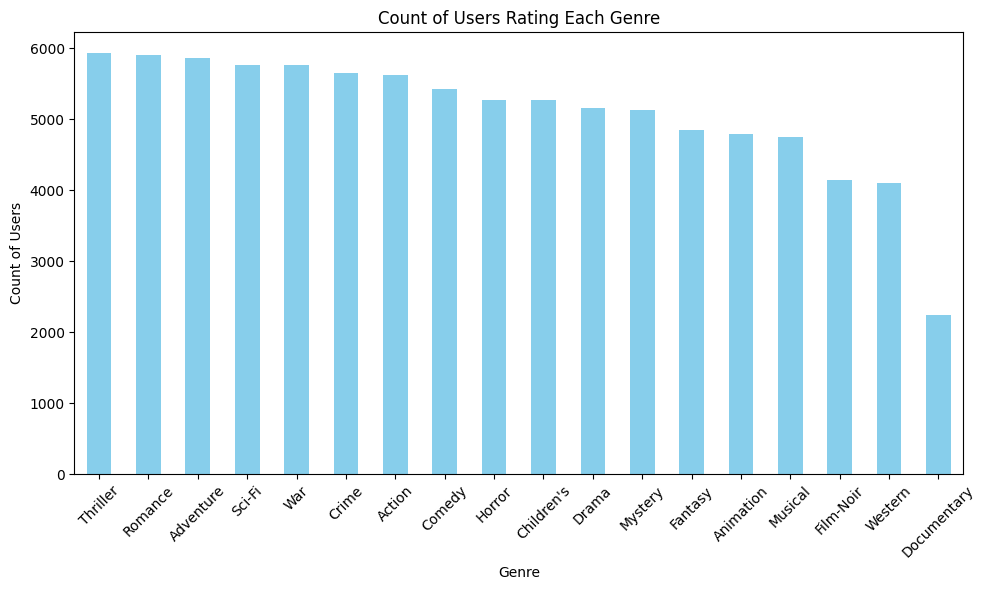

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming result_df is your DataFrame containing the ratings
genre_counts = result_df.drop(columns='UserID').astype(bool).sum()

plt.figure(figsize=(10,6))
genre_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Count of Users Rating Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Graph plot between Genre and 

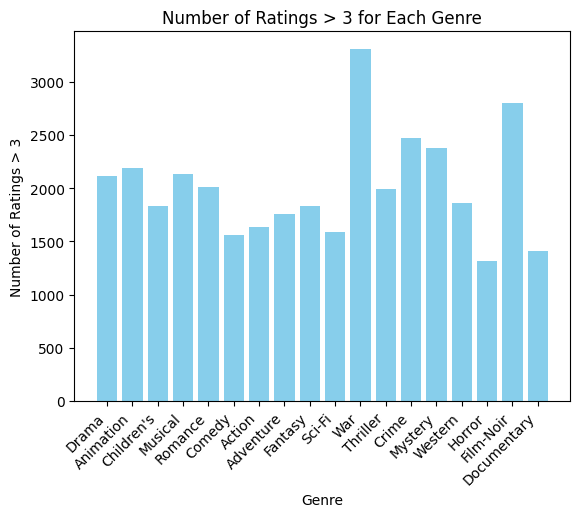

In [31]:
import matplotlib.pyplot as plt

# Initialize an empty dictionary to store the counts
genre_counts = {}

# Iterate over each genre column
for genre in result_df.columns[1:]:  # Exclude the UserID column
    # Count the number of ratings greater than 3 for the current genre
    count = result_df[genre][result_df[genre] > 3].count()
    
    # Store the count in the dictionary
    genre_counts[genre] = count

# Plot the counts
plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Number of Ratings > 3')
plt.title('Number of Ratings > 3 for Each Genre')


# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


## SVD applied from scratch

In [32]:
def power_iteration(A, num_iterations=300, tol=1e-6):
    n = A.shape[0]
    eigenvalues = []
    eigenvectors = []
    
    for _ in range(num_iterations):
        b = np.random.rand(n)  # Initialize a random vector
        for _ in range(num_iterations):
            b_next = np.dot(A, b)
            b_next_norm = np.linalg.norm(b_next, ord=np.inf)
            if b_next_norm == 0:
                b_next_norm = 1
            b_next = b_next / b_next_norm
            if np.linalg.norm(b - b_next, ord=2) < tol:
                break
            b = b_next
        eigenvalue = np.dot(b, np.dot(A, b))  # Rayleigh quotient for the eigenvalue
        eigenvalues.append(eigenvalue)
        eigenvectors.append(b)
        
        # Deflate the matrix
        A = A - eigenvalue * np.outer(b, b)
        
    return np.array(eigenvalues), np.array(eigenvectors).T

In [33]:
import numpy as np

def svd(A, tol=1e-10):
    # Compute the covariance matrices
    ATA = np.dot(A.T, A)
    AAT = np.dot(A, A.T)

    # Compute eigenvalues and eigenvectors of the covariance matrices
#     eigvals_AAT, U = np.linalg.eigh(AAT)
#     eigvals_ATA, V = np.linalg.eigh(ATA)
    eigvals_AAT, U = power_iteration(AAT)
    eigvals_ATA, V = power_iteration(ATA)

    # Sort the eigenvalues in descending order
    S = np.sqrt(np.maximum(eigvals_AAT, 0))  # singular values

    # Sort the eigenvectors according to the singular values
    idx = np.argsort(-S)
    S = S[idx]
    U = U[:, idx]

    # Compute Vt
    Vt = V.T

    # Remove small singular values and corresponding vectors
    rank = np.sum(S > tol)
    U = U[:, :rank]
    S = S[:rank]
    Vt = Vt[:rank, :]

    return U, S, Vt

class TruncatedSVD:
    def __init__(self, n_components):
        self.n_components = n_components

    def fit(self, X):
        # Compute the SVD of X
        U, S, Vt = svd(X)

        # Truncate the SVD
        self.U = U[:, :self.n_components]
        self.S = S[:self.n_components]
        self.Vt = Vt[:self.n_components, :]

    def transform(self, X):
        # Project X onto the truncated SVD
        return np.dot(X, self.Vt.T) 

# Instantiate the TruncatedSVD class
truncated_svd = TruncatedSVD(n_components=12)


# Fit the TruncatedSVD
truncated_svd.fit(result_df)


/tmp/ipykernel_34/4161086749.py:13: RuntimeWarning: invalid value encountered in divide
  b_next = b_next / b_next_norm


In [34]:
transformed_data = truncated_svd.transform(result_df)

In [36]:
svd_data_df = pd.DataFrame(transformed_data, columns=[f'component_{i}' for i in range(transformed_data.shape[1])])


svd_data_df['UserID'] = result_df['UserID']
# Sort svd_data_df based on 'UserID'
svd_data_df = svd_data_df.sort_values(by='UserID')

In [37]:
svd_data_df.head()

,component_0,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,UserID
0,0.020385,0.020400,23.776046,23.776046,23.776046,23.776046,23.776046,23.776046,23.776046,23.776046,23.776046,23.776046,0
1,1.037639,1.037667,45.388169,45.388169,45.388169,45.388169,45.388169,45.388169,45.388169,45.388169,45.388169,45.388169,1
2,2.029612,2.029635,35.783807,35.783807,35.783807,35.783807,35.783807,35.783807,35.783807,35.783807,35.783807,35.783807,2
3,3.035081,3.035108,42.785612,42.785612,42.785612,42.785612,42.785612,42.785612,42.785612,42.785612,42.785612,42.785612,3
4,4.033511,4.033536,40.054104,40.054104,40.054104,40.054104,40.054104,40.054104,40.054104,40.054104,40.054104,40.054104,4


## Taking only 80% data of svd_data_df and got a better result

In [38]:
import numpy as np
import pandas as pd

# Assuming you have a DataFrame named 'result_df' containing your data
# result_df = your_dataframe_data

# Convert the SVD data to a DataFrame
train_data = pd.DataFrame(svd_data_df)

# Calculate the number of rows in the DataFrame
total_rows = train_data.shape[0]

# Calculate the number of rows for the training set (80%)
train_rows = int(0.8 * total_rows)

# Randomly shuffle the indices of the rows
indices = np.random.permutation(total_rows)

# Split the indices into training and testing indices
train_indices, test_indices = indices[:train_rows], indices[train_rows:]

# Split the DataFrame into training and testing sets based on the indices
train_data, test_data = svd_data_df.iloc[train_indices], svd_data_df.iloc[test_indices]

In [39]:
svd_data_df.shape

(6041, 13)

In [40]:
test_data.shape

(1209, 13)

## KMeans applied from scratch

In [41]:
import numpy as np
import pandas as pd

class KMeans:
    def _init_(self):
        pass

    def fit(self, X, n_clusters=8, max_iter=10,random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        if isinstance(X, pd.DataFrame):
            X = X.values

        if self.random_state is not None:
            np.random.seed(self.random_state)
            
        
        # Initialize centroids randomly
        centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iter):
            # Compute distances between each point and centroids
            distances = np.sqrt(((X[:, np.newaxis] - centroids) ** 2).sum(axis=2))
            
            # Assign each data point to the closest centroid
            labels = np.argmin(distances, axis=1)
            
            # Update centroids
            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
            
            # Check for convergence
            if np.all(centroids == new_centroids):
                break
                
            centroids = new_centroids
        
        self.labels_ = labels
        self.cluster_centers_ = centroids

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        distances = np.sqrt(((X[:, np.newaxis] - self.cluster_centers_) ** 2).sum(axis=2))
        return np.argmin(distances, axis=1)

In [42]:
# from sklearn.cluster import KMeans
# Decide on the number of clusters (K)
k = 500  # Adjust as needed

# Apply K-means clustering
# kmeans = KMeans(n_clusters=k, random_state=42)
# kmeans.fit(train_data)
kmeans = KMeans()
kmeans.fit(train_data, n_clusters=500,random_state=42)

# Get the cluster labels
cluster_labels = kmeans.labels_


In [43]:
cluster_labels

array([284, 329, 280, ..., 339, 440,  82])

## Mark the users in the clusters where new user belongs

## 

In [44]:
# Find the index of the user with UserID equal to 0 in svd_data_df
user_index = svd_data_df.index[svd_data_df['UserID'] == 0].tolist()[0]

# Get the cluster label for the user with UserID 0
user_cluster_label = cluster_labels[user_index]

# Find the indices of other users in the same cluster
cluster_members_indices = np.where(cluster_labels == user_cluster_label)[0]

# Exclude the index of the user with UserID 0
cluster_members_indices = cluster_members_indices[cluster_members_indices != user_index]

# Get the UserIDs of other users in the same cluster
cluster_members_userids = svd_data_df.loc[cluster_members_indices, 'UserID']


# Age based Recommendation
# Filter the DataFrame based on the UserIDs and the age range
filtered_df = df_users[df_users['UserID'].isin(cluster_members_userids) & (df_users['Age'] >= 20) & (df_users['Age'] <= 40)]
filtered_user_ids = filtered_df['UserID']



# Store the UserIDs of other users of the same cluster
print("UserIDs of other users in the same cluster as UserID 0:", cluster_members_userids.tolist())
print("UserIDs of other users in the same cluster as UserID 0:", filtered_user_ids.tolist())

UserIDs of other users in the same cluster as UserID 0: [41, 67, 435, 597, 930, 1485, 1605, 1742, 2701, 2947, 3257, 3277, 3454, 3618, 3753, 4262, 4688]
UserIDs of other users in the same cluster as UserID 0: [435, 597, 930, 1485, 1742, 2947, 3257, 3277, 3753, 4262, 4688]


## Pearson's Correlation prediction


In [45]:
def pearson_correlation(user_ratings, other_user_ratings):
    # Mean of user ratings
    mean_user = np.mean(user_ratings)
    mean_other_user = np.mean(other_user_ratings)
    
    # Compute covariance
    cov = np.sum((user_ratings - mean_user) * (other_user_ratings - mean_other_user))
    
    # Compute standard deviations
    std_user = np.sqrt(np.sum((user_ratings - mean_user) ** 2))
    std_other_user = np.sqrt(np.sum((other_user_ratings - mean_other_user) ** 2))
    
    # Compute Pearson correlation coefficient
    pearson_corr = cov / (std_user * std_other_user)
    
    return pearson_corr


In [46]:
import math


# Calculate Pearson's correlation coefficient between the user with UserID 0 and other users in the same cluster
correlation_coefficients = []
for idx in cluster_members_indices:
    corr= pearson_correlation(svd_data_df.iloc[user_index, :-1], svd_data_df.iloc[idx, :-1])
    correlation_coefficients.append(corr)

# Convert correlation coefficients to weights (normalize them)
weights = np.abs(correlation_coefficients) / np.sum(np.abs(correlation_coefficients))

# Get the ratings for the users in the same cluster
ratings_cluster = result_df[result_df['UserID'].isin(cluster_members_userids)]

# Calculate the weighted average ratings for each genre
weighted_avg_ratings = {}
for genre in ratings_cluster.columns[1:]:
    genre_ratings = ratings_cluster[genre]
    weighted_avg_ratings[genre] = np.sum(weights * genre_ratings) / np.sum(weights)
    weighted_avg_ratings[genre] = math.ceil(weighted_avg_ratings[genre])

# Print the weighted average ratings for each genre
for genre, rating in weighted_avg_ratings.items():
    print(f"Weighted Average Rating for {genre}: {rating}")

Weighted Average Rating for Drama: 4
Weighted Average Rating for Animation: 3
Weighted Average Rating for Children's: 3
Weighted Average Rating for Musical: 3
Weighted Average Rating for Romance: 4
Weighted Average Rating for Comedy: 3
Weighted Average Rating for Action: 3
Weighted Average Rating for Adventure: 4
Weighted Average Rating for Fantasy: 3
Weighted Average Rating for Sci-Fi: 3
Weighted Average Rating for War: 4
Weighted Average Rating for Thriller: 4
Weighted Average Rating for Crime: 4
Weighted Average Rating for Mystery: 3
Weighted Average Rating for Western: 3
Weighted Average Rating for Horror: 3
Weighted Average Rating for Film-Noir: 4
Weighted Average Rating for Documentary: 2


## True user ratings for comparision

In [47]:
# Find the row corresponding to UserID 219
user_219_row = result_df.loc[result_df['UserID'] == 0]

# Print the row
print(user_219_row)


   UserID  Drama  Animation  Children's  Musical  Romance  Comedy  Action  \
0       0    4.0        0.0         0.0      0.0      4.0     0.0     4.0   

   Adventure  Fantasy  Sci-Fi  War  Thriller  Crime  Mystery  Western  Horror  \
0        0.0      0.0     0.0  5.0       5.0    4.0      0.0      0.0     0.0   

   Film-Noir  Documentary  
0        0.0          0.0  


## Movie reccommendation

In [48]:
import statistics

# Dictionary to store mode ratings for each movie
movie_mode_ratings = {}

# Iterate over each row in the DataFrame
for index, row in df_movies.iterrows():
    title = row['Title']
    genres = row['Genres']
    genre_mode_ratings = []
    # Iterate over each genre of the movie
    for genre in genres:
        # Calculate the mode of the ratings for the genre
        genre_mode = weighted_avg_ratings[genre]
        genre_mode_ratings.append(genre_mode)
    # Calculate the overall mode rating for the movie
    movie_mode_rating = math.ceil(statistics.mode(genre_mode_ratings))
    # Store the mode rating in the dictionary
    movie_mode_ratings[title] = (movie_mode_rating, sum(genre_mode_ratings))

sorted_movies = sorted(movie_mode_ratings.items(), key=lambda x: (x[1][0], x[1][1]), reverse=True)

# Print the top 20 entries
print("Top 20 movies by mode rating and sum of genre ratings:")
for i, (title, mode_and_sum) in enumerate(sorted_movies[:20], 1):
    mode_rating, sum_ratings = mode_and_sum
    # Retrieve the genres for the current title
    genres = df_movies.loc[df_movies['Title'] == title, 'Genres'].values[0]
    # Print the title, mode_rating, sum_ratings, and genres
    print(f"{i}. Title: {title}, Mode Rating: {mode_rating}, Genres: {genres}")


Top 20 movies by mode rating and sum of genre ratings:
1. Title: Star Wars: Episode V - The Empire Strikes Back (1980), Mode Rating: 4, Genres: ['Action', 'Adventure', 'Drama', 'Sci-Fi', 'War']
2. Title: Star Wars: Episode VI - Return of the Jedi (1983), Mode Rating: 4, Genres: ['Action', 'Adventure', 'Romance', 'Sci-Fi', 'War']
3. Title: Diva (1981), Mode Rating: 4, Genres: ['Action', 'Drama', 'Mystery', 'Romance', 'Thriller']
4. Title: Soldier (1998), Mode Rating: 4, Genres: ['Action', 'Adventure', 'Sci-Fi', 'Thriller', 'War']
5. Title: Professional, The (a.k.a. Leon: The Professional) (1994), Mode Rating: 4, Genres: ['Crime', 'Drama', 'Romance', 'Thriller']
6. Title: Bound (1996), Mode Rating: 4, Genres: ['Crime', 'Drama', 'Romance', 'Thriller']
7. Title: Key Largo (1948), Mode Rating: 4, Genres: ['Crime', 'Drama', 'Film-Noir', 'Thriller']
8. Title: Devil in a Blue Dress (1995), Mode Rating: 4, Genres: ['Crime', 'Film-Noir', 'Mystery', 'Thriller']
9. Title: First Knight (1995), Mode

In [52]:
correlation_coefficients.sort()
correlation_coefficients

[-0.9999999999999397,
 -0.9999999999999394,
 -0.9999999999999394,
 -0.9999999999999392,
 -0.999999999999939,
 -0.9999999999999389,
 -0.9999999999999388,
 -0.9999999999999387,
 -0.9999999999999386,
 -0.9999999999999384,
 -0.9999999999999375,
 -0.9999999999999374,
 -0.9999999999999354,
 -0.9999999999999303,
 -0.9999999999999283,
 -0.9999999999994857,
 -0.9999999598968092]